In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Sagar/Downloads/Python_Amazon_Sales_Analysis-main/Python_Amazon_Sales_Analysis-main/Amazon Sale Report.csv")

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [5]:
def chng_colu(df):
    new_columns = []
    for col in df.columns.to_list():
        try:
            col = col.strip()
            col = col.replace(" ", "_").lower()
            new_columns.append(col)
        except Exception as e:
            print(f"Error processing column name: {col}. Error: {e}")
            new_columns.append(col)
    df.columns = new_columns
    return df

# Note: You need to call the function and pass a DataFrame to it
df = chng_colu(df)
        
        

In [6]:
df.head(1)

,index,order_id,date,status,fulfilment,sales_channel,ship-service-level,category,size,courier_status,...,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b,fulfilled-by,new,pendings
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN


In [7]:
df.drop(['new','pendings'],axis = 1,inplace = True)

In [8]:
df.shape

(128976, 19)

In [9]:
df.isnull().sum()*100/len(df)

index                  0.000000
order_id               0.000000
date                   0.000000
status                 0.000000
fulfilment             0.000000
sales_channel          0.000000
ship-service-level     0.000000
category               0.000000
size                   0.000000
courier_status         0.000000
qty                    0.000000
currency               6.047637
amount                 6.047637
ship-city              0.027137
ship-state             0.027137
ship-postal-code       0.027137
ship-country           0.027137
b2b                    0.000000
fulfilled-by          69.557902
dtype: float64

In [10]:
df.drop(['fulfilled-by'],axis = 1,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()*100/len(df)

index                 0.0
order_id              0.0
date                  0.0
status                0.0
fulfilment            0.0
sales_channel         0.0
ship-service-level    0.0
category              0.0
size                  0.0
courier_status        0.0
qty                   0.0
currency              0.0
amount                0.0
ship-city             0.0
ship-state            0.0
ship-postal-code      0.0
ship-country          0.0
b2b                   0.0
dtype: float64

In [13]:
def cat_cont(df):
    cont = df.select_dtypes(float,int).columns.to_list()
    cat = df.select_dtypes(object).columns.to_list()
    return cont,cat
cat,cont = cat_cont(df)
print(cont)
print(cat)

['order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship-service-level', 'category', 'size', 'courier_status', 'currency', 'ship-city', 'ship-state', 'ship-country']
['amount', 'ship-postal-code']


In [14]:
unique_values = {col_name: df[col_name].unique() for col_name in df.columns}
unique_values

{'index': array([     0,      1,      2, ..., 128972, 128973, 128974], dtype=int64),
 'order_id': array(['405-8078784-5731545', '171-9198151-1101146',
        '404-0687676-7273146', ..., '407-9547469-3152358',
        '402-6184140-0545956', '408-7436540-8728312'], dtype=object),
 'date': array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
        '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
        '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
        '04-15-22', '04-14-22', '04-13-22', '04-12-2022', '04-11-2022',
        '04-10-2022', '04-09-2022', '04-08-2022', '04-07-2022',
        '04-06-2022', '04-05-2022', '04-04-2022', '04-03-2022',
        '04-02-2022', '04-01-2022', '03-31-22', '05-31-22', '05-30-22',
        '05-29-22', '05-28-22', '05-27-22', '05-26-22', '05-25-22',
        '05-24-22', '05-23-22', '05-22-22', '05-21-22', '05-20-22',
        '05-19-22', '05-18-22', '05-17-22', '05-16-22', '05-15-22',
        '05-14-22', '05-13-22', 

In [15]:
df['order_id'].unique()

array(['405-8078784-5731545', '171-9198151-1101146',
       '404-0687676-7273146', ..., '407-9547469-3152358',
       '402-6184140-0545956', '408-7436540-8728312'], dtype=object)

In [16]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Sagar\AppData\Local\Temp\ipykernel_2788\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [17]:
df.describe()

,index,date,qty,amount,ship-postal-code
count,121143.000000,121143,121143.000000,121143.000000,121143.000000
mean,64486.312655,2022-05-12 12:11:22.182214144,0.961252,648.576874,463623.724507
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32294.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64477.000000,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,96682.500000,2022-06-04 00:00:00,1.000000,788.000000,600020.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000
std,37220.415404,NaN,0.214276,281.196896,191301.588170


In [18]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [19]:
df['ship-postal-code'].dtype

dtype('int32')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121143 non-null  int64         
 1   order_id            121143 non-null  object        
 2   date                121143 non-null  datetime64[ns]
 3   status              121143 non-null  object        
 4   fulfilment          121143 non-null  object        
 5   sales_channel       121143 non-null  object        
 6   ship-service-level  121143 non-null  object        
 7   category            121143 non-null  object        
 8   size                121143 non-null  object        
 9   courier_status      121143 non-null  object        
 10  qty                 121143 non-null  int64         
 11  currency            121143 non-null  object        
 12  amount              121143 non-null  float64       
 13  ship-city           121143 non-nul

In [32]:
df.head(20)

,index,order_id,date,status,fulfilment,sales_channel,ship-service-level,category,size,courier_status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102,IN,False
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.00,CHANDIGARH,CHANDIGARH,160036,IN,False
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False
9,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.00,Chennai,TAMIL NADU,600041,IN,False
10,10,407-5633625-6970741,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.00,CHENNAI,TAMIL NADU,600073,IN,False


## Exploratory Data Analysis

In [21]:
df.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'b2b'],
      dtype='object')

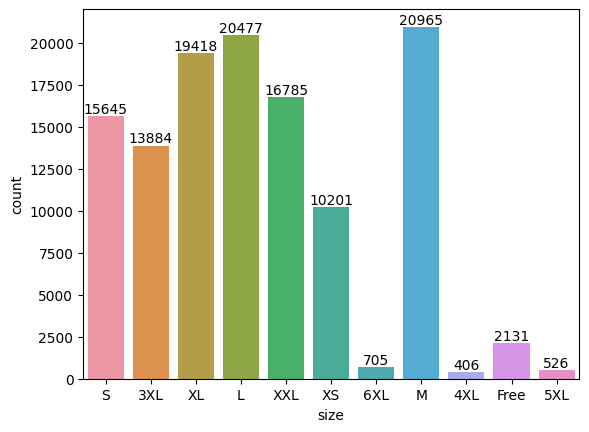

In [22]:
ax = sns.countplot(x='size' , data=df)
for bars in ax.containers:
    ax.bar_label(bars)

#### Note: From above Graph you can see that most of the people buys M-Size

# Group By
#### The groupby() function in pandas is used to group data based on one or more columns in a DataFrame

In [23]:
df.groupby(['size'], as_index=False)['qty'].sum().sort_values(by='qty',ascending=False)

,size,qty
6,M,20113
5,L,19667
8,XL,18611
10,XXL,16217
7,S,15019
0,3XL,13341
9,XS,9835
4,Free,2051
3,6XL,687
2,5XL,512


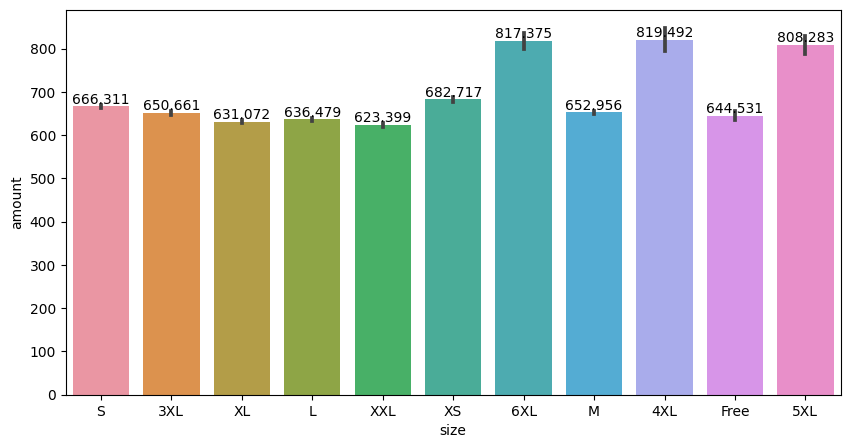

In [24]:
a = sns.barplot(x = 'size',y='amount',data=df)
for bars in a.containers:
    a.bar_label(bars)
plt.gcf().set_size_inches(10,5)
plt.show()

#### Note: Above graph shows total amount of all sizes and M size having maximum total amount.

<Axes: xlabel='courier_status', ylabel='count'>

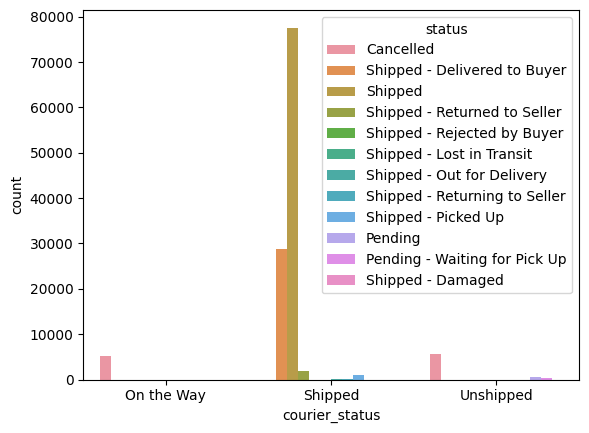

In [25]:
sns.countplot(data = df,x='courier_status',hue='status')

#### Note: From above Graph the majority of the orders are shipped through the courier.

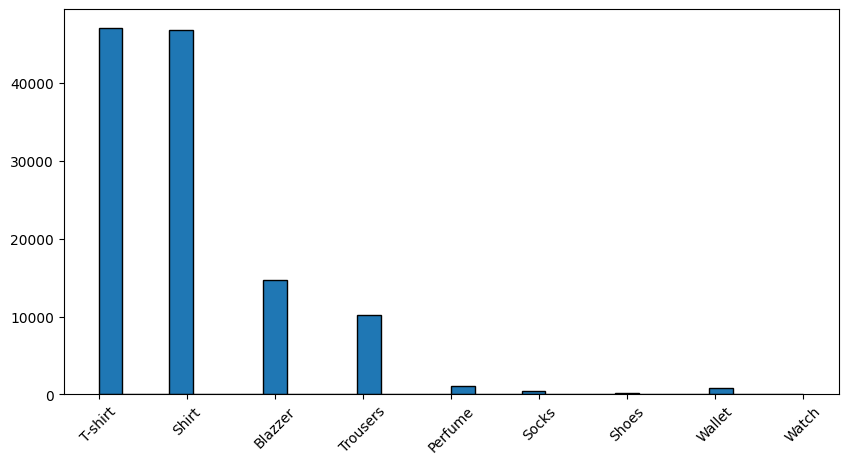

In [26]:
import matplotlib.pyplot as plt
df['category'] = df['category']
column_data = df['category']
plt.figure(figsize=(10,5))
plt.hist(column_data, bins=30, edgecolor='Black')
plt.xticks(rotation=45)
plt.show()

#### Note: From above Graph you can see that most of the  buyers are T-shirt

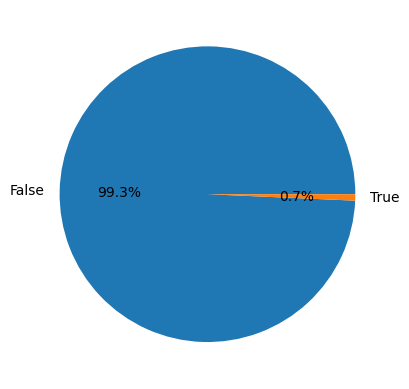

In [27]:
B2B_Check = df['b2b'].value_counts()
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
plt.show()

#### Note : From above chart  we can see that maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers

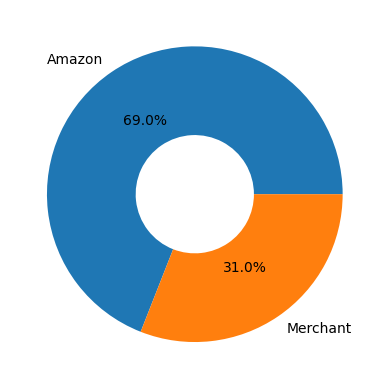

In [28]:
a1 = df['fulfilment'].value_counts()
fig, ax = plt.subplots()
ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=1, wedgeprops=dict(width=0.6))
plt.show()

#### Note: From above chart you can see that most of the  Fulfilment  are  amazon

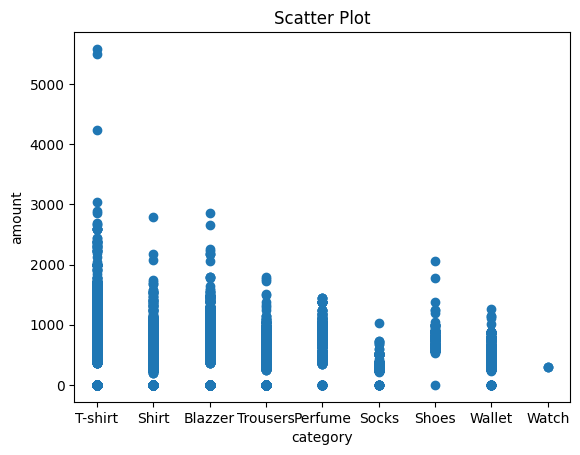

In [29]:
x_data = df['category']  
y_data = df['amount'] 
plt.scatter(x_data, y_data)
plt.xlabel('category')  
plt.ylabel('amount')  
plt.title('Scatter Plot') 
plt.show()

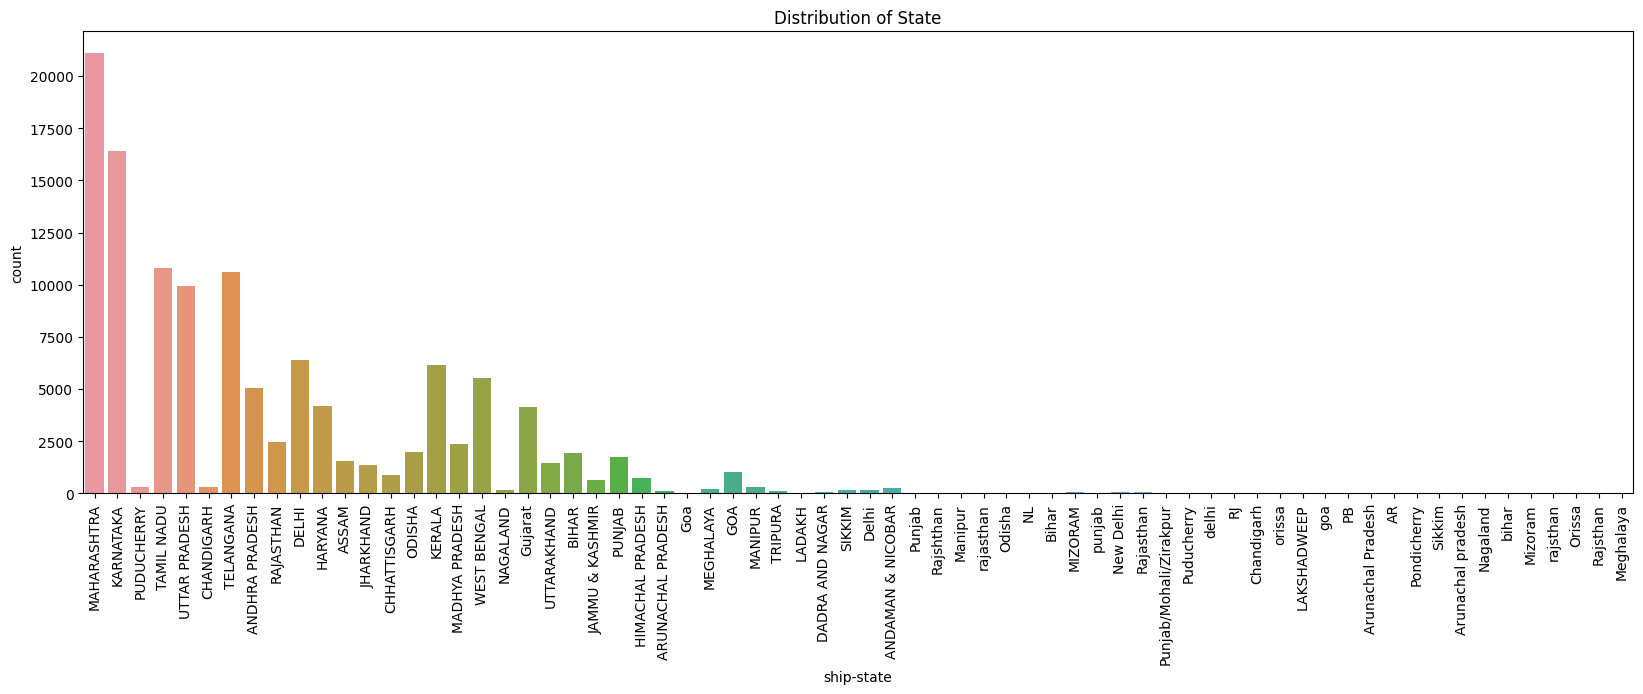

In [30]:
# Plot count of cities by state
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

#### Note: This graph shows the ship_state count of all the states.

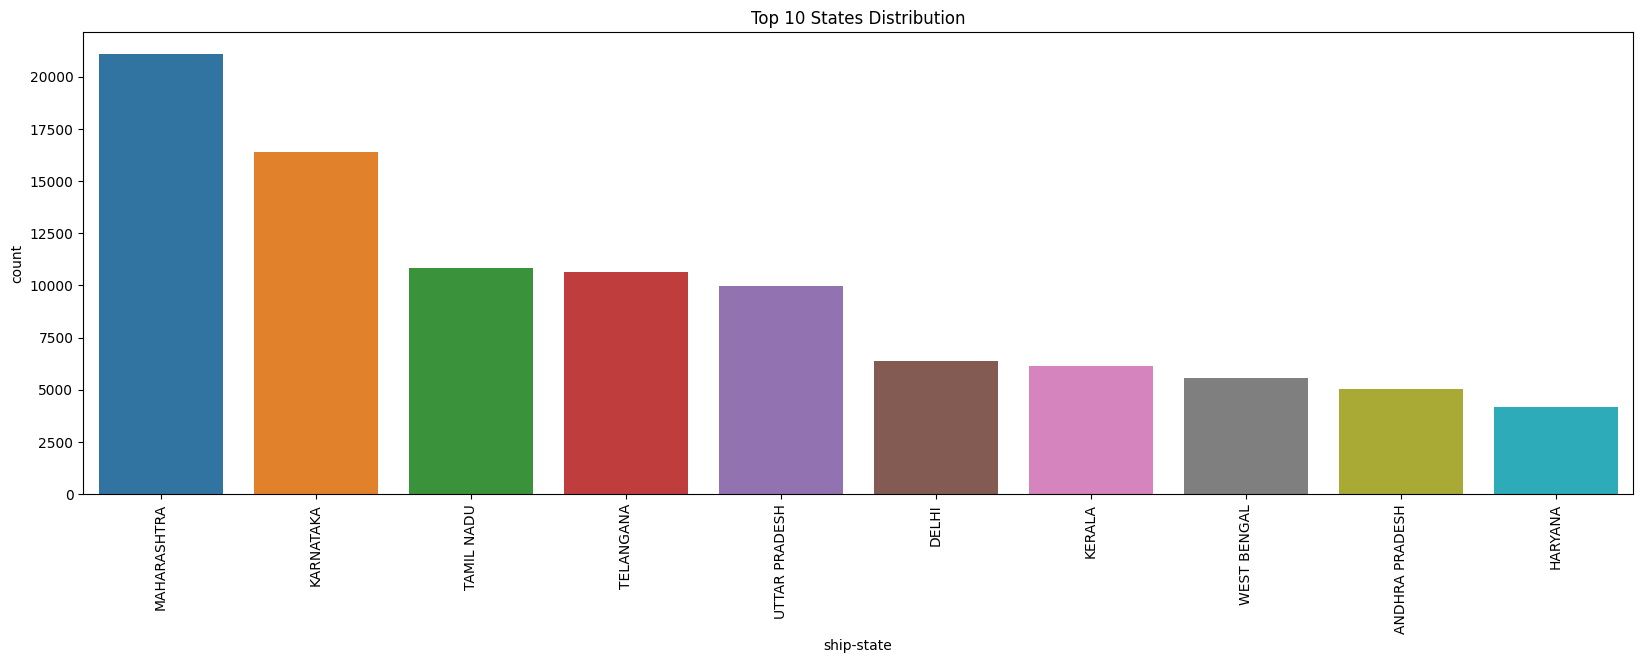

In [31]:
top_states = df['ship-state'].value_counts().head(10).index.tolist()
df_top_states = df[df['ship-state'].isin(top_states)]

plt.figure(figsize=(20, 6))
sns.countplot(data=df_top_states, x='ship-state', order=top_states)
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Top 10 States Distribution')
plt.xticks(rotation=90)
plt.show()


#### Note: From above Graph you can see that most of the  buyers are Maharashtra state

## Conclusion

### The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.